Code to calculate the plot the UEQ scores from the additional study comparing the AI-enabled self-referral tool to a user-friendly but non-AI chatbot and standard webform.

In addition, the ANOVA and t-tests stats are calculated.

In [21]:
### Load all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import matplotlib.font_manager as fm
import scipy.stats as stats
from itertools import combinations

# add the aeroport font for the plots
font_path = '/Users/johanna/Downloads/Aeroport.ttf'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path

# Figure's folder
folder_figures_save='/Users/johanna/Library/CloudStorage/GoogleDrive-johanna@limbic.ai/Shared drives/05_Research/Publications (research papers)/Clinical/Increased_Access/Figures/'

In [22]:
# Load the data
UEQ_df_individual = pd.read_csv('./UEQ_individual_results.xls')

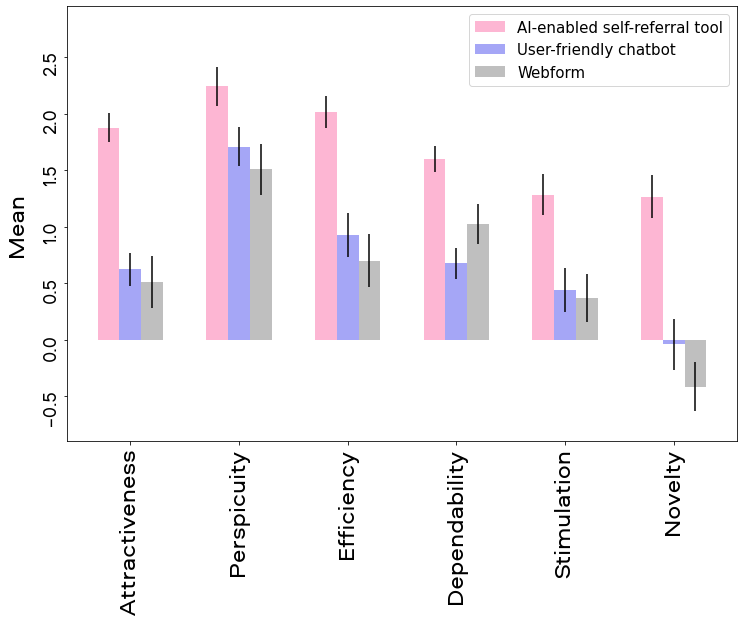

In [24]:
# Calculate the mean and standard error for each measure and arm
means = UEQ_df_individual.groupby(['Arm']).mean()
std_errors = UEQ_df_individual.groupby(['Arm']).sem()

# Specify the desired order for arms
arm_order = ['AI-enabled self-referral tool', 'User-friendly chatbot', 'Webform']

# Create the bar plot with specified colors
fig, ax = plt.subplots(figsize=(12, 8))

width = 0.2
x = np.arange(len(means.columns))
arms = means.index

colors = ['#fdb6d3', '#a5a6f6', '#bfbfbf']  # Color for each arm

for i, arm in enumerate(arm_order):
    ax.bar(x + i * width, means.loc[arm], width, label=arm, yerr=std_errors.loc[arm], color=colors[i])

ax.set_ylabel('Mean', fontsize=24, font = my_font, labelpad=15)
ax.legend(fontsize=15)
ax.set_xticks(x + width * (len(arm_order) - 1) / 2)
ax.set_xticklabels(means.columns,font = my_font,fontsize=24, rotation=90)
plt.yticks(rotation=90,fontsize=18, font = my_font)

plt.ylim(-0.9,2.95)

image_name = folder_figures_save+'UEQ.png'
# fig.savefig(image_name, format='png', bbox_inches="tight", dpi=1200)


## ANOVA and t-tests

In [6]:
# List of measures
measures = ['Attractiveness', 'Perspicuity', 'Efficiency', 'Dependability', 'Stimulation', 'Novelty']

# Perform ANOVA for each measure
for measure in measures:
    print(f"ANOVA for {measure}:")
    groups = [UEQ_df_individual[UEQ_df_individual['Arm'] == arm][measure] for arm in UEQ_df_individual['Arm'].unique()]
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    print("")


ANOVA for Attractiveness:
F-statistic: 18.93
P-value: 0.0000

ANOVA for Perspicuity:
F-statistic: 3.89
P-value: 0.0241

ANOVA for Efficiency:
F-statistic: 13.24
P-value: 0.0000

ANOVA for Dependability:
F-statistic: 10.59
P-value: 0.0001

ANOVA for Stimulation:
F-statistic: 6.65
P-value: 0.0021

ANOVA for Novelty:
F-statistic: 17.47
P-value: 0.0000



In [11]:
# Perform independent t-tests for all pairs of arms for each measure
for measure in measures:
    print(f"Independent t-tests for {measure}:")
    arms = UEQ_df_individual['Arm'].unique()
    combinations_arms = list(combinations(arms, 2))
    
    for combination in combinations_arms:
        arm1, arm2 = combination
        group1 = UEQ_df_individual[UEQ_df_individual['Arm'] == arm1][measure]
        group2 = UEQ_df_individual[UEQ_df_individual['Arm'] == arm2][measure]
        
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        print(f"Comparison between {arm1} and {arm2}:")
        print(f"T-statistic: {t_statistic:.2f}")
        print(f"P-value: {p_value:.4f}")
        print("")


Independent t-tests for Attractiveness:
Comparison between Webform and User-friendly chatbot:
T-statistic: -0.41
P-value: 0.6855

Comparison between Webform and AI-enabled self-referral tool:
T-statistic: -5.16
P-value: 0.0000

Comparison between User-friendly chatbot and AI-enabled self-referral tool:
T-statistic: -6.44
P-value: 0.0000

Independent t-tests for Perspicuity:
Comparison between Webform and User-friendly chatbot:
T-statistic: -0.70
P-value: 0.4884

Comparison between Webform and AI-enabled self-referral tool:
T-statistic: -2.59
P-value: 0.0121

Comparison between User-friendly chatbot and AI-enabled self-referral tool:
T-statistic: -2.19
P-value: 0.0323

Independent t-tests for Efficiency:
Comparison between Webform and User-friendly chatbot:
T-statistic: -0.74
P-value: 0.4609

Comparison between Webform and AI-enabled self-referral tool:
T-statistic: -4.82
P-value: 0.0000

Comparison between User-friendly chatbot and AI-enabled self-referral tool:
T-statistic: -4.53
P-va